In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import IFrame, display

pd.options.display.max_columns = None

In [2]:
filename = "data/Mother Jones' Investigation_ US Mass Shootings, 1982-2018 - US mass shootings.csv"

In [3]:
df = pd.read_csv(filename)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 22 columns):
case                                   99 non-null object
location                               99 non-null object
date                                   99 non-null object
year                                   99 non-null int64
summary                                99 non-null object
Fatalities                             99 non-null int64
Injured                                99 non-null int64
total_victims                          99 non-null object
Venue                                  99 non-null object
Prior signs of mental health issues    99 non-null object
Mental health - details                98 non-null object
Weapons obtained legally               99 non-null object
Where obtained                         98 non-null object
Type of weapons                        99 non-null object
Weapon details                         99 non-null object
Race                          

In [4]:
# What's up with total_victims not being numeric?? That would be useful
df.total_victims.unique()

array(['8', '3', '31', '5', '15', '46', '6', '604',
       '11 (dozens more were reportedly injured in the panic)', '16',
       '102', '17', '35', '12', '18', '7', '10', '4', '19', '20', '9',
       '29', '82', '11', '43', '26', '13', '55', '22', '37', '28', '25',
       '14', '44', '21', '41'], dtype=object)

In [5]:
# Ugh someone threw a string in there. Ok well....
df['casualties'] = df.Injured + df.Fatalities
df.casualties.dtype

dtype('int64')

In [6]:
df.head()

,case,location,date,year,summary,Fatalities,Injured,total_victims,Venue,Prior signs of mental health issues,Mental health - details,Weapons obtained legally,Where obtained,Type of weapons,Weapon details,Race,Gender,Sources,Mental Health Sources,latitude,longitude,Type,casualties
0,Waffle House shooting,"Nashville, TN",4/22/18,2018,"Travis Reinking, 29, opened fire around 3:30 a...",4,4,8,Other,Yes,Reinking had a history of erratic behavior and...,TBD,Family member,semiautomatic rifle,AR-15,White,M,https://www.washingtonpost.com/news/post-natio...,https://www.buzzfeed.com/briannasacks/this-is-...,36.052521,-86.616944,Mass,8
1,Yountville veterans home shooting,"Yountville, CA",3/9/18,2018,"Army veteran Albert Cheung Wong, 36, stormed a...",3,0,3,Workplace,Yes,Wong had served in Afghanistan and had a histo...,Yes,TBD,semiautomatic rifle; shotgun,-,Asian,M,https://www.cnn.com/2018/03/10/us/california-v...,https://www.cnn.com/2018/03/10/us/california-v...,38.392496,-122.366528,Mass,3
2,Stoneman Douglas High School shooting,"Parkland, Florida",2/14/18,2018,"Nikolas J. Cruz, 19, heavily armed with an AR-...",17,14,31,School,Yes,Cruz had a long history of behavioral problems...,Yes,A Florida pawn shop,semiautomatic rifle,AR-15,White,M,https://www.nytimes.com/2018/02/14/us/parkland...,https://www.nytimes.com/2018/02/15/us/nikolas-...,26.304830,-80.269511,Mass,31
3,Pennsylvania carwash shooting,"Melcroft, PA",1/28/18,2018,"Timothy O'Brien Smith, 28, wearing body armor ...",4,1,5,Other,TBD,-,TBD,TBD,semiautomatic rifle and semiautomatic handgun,-,White,M,http://www.wpxi.com/news/top-stories/family-me...,-,40.052151,-79.389166,Mass,5
4,Rancho Tehama shooting spree,"Rancho Tehama, CA",11/14/17,2017,"Kevin Janson Neal, 44, went on an approximatel...",5,10,15,Other,TBD,-,No,TBD,semiautomatic rifles,Two illegally modified rifles,White,M,https://www.nbcnews.com/news/us-news/californi...,-,40.018759,-122.393089,Spree,15


In [7]:
# most recent story
most_recent = df.iloc[[0]]
urls = most_recent['Sources'][0].split(';')
IFrame(urls[0], width=850, height=450)

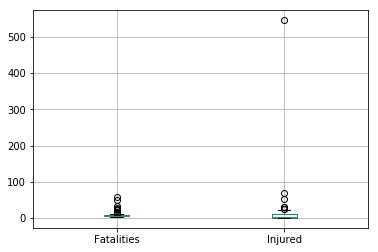

In [8]:
# numerical columns are just ['year','Fatalities','Injured','latitude','longitude']
# doesn't give much to work with in terms of correlation but categorical comparisons can be done
df[['Fatalities','Injured']].boxplot()
plt.show()

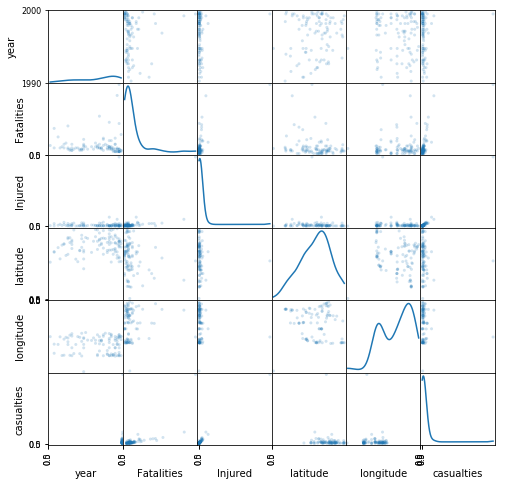

In [9]:
# not the most useful plot but I wanna try it
def plot_scatter_matrix(df):    
    """
    Make scatterplot matrix to compare multiple features together

    Parameters:
    -----------
    df: a Dataframe to use
    """
#     plt.figure(figsize=(8,8))
    axs = pd.plotting.scatter_matrix(df, alpha=0.2, diagonal='kde')

    for ax in axs[:,0]: # the left boundary
        ax.grid('off', axis='both')
        ax.set_yticks([0, .5])

    for ax in axs[-1,:]: # the lower boundary
        ax.grid('off', axis='both')
        ax.set_xticks([0, .5])

    figure = plt.gcf()
    figure.set_size_inches(8,8)
    plt.show()
    
plot_scatter_matrix(df)

In [10]:
# import mapboxgl as mbgl
# import pysal.esda.mapclassify as mapclassify

# from mapboxgl.viz import * 

# data_url = 'https://raw.githubusercontent.com/mapbox/mapboxgl-jupyter/master/examples/data/points.csv'
# test_df = pd.read_csv(data_url)

# # Must be a public token, starting with `pk`
# token = 'pk.eyJ1IjoidHI1IiwiYSI6ImNqZ2cwMm54czA4eDcycXFtdHA1eWNsaW0ifQ.GBCT-wNb5xVec_dtyoWipQ'

In [11]:
# # Create a geojson file export from a Pandas dataframe
# mbgl.utils.df_to_geojson(df, filename='points.geojson',
#               properties=['case','Fatalities','Injured','date','year'],
#               lat='latitude', lon='longitude', precision=3)


# data = df
# main_prop = 'Fatalities'
# second_prop = 'Injured'


# # Generate data breaks and color stops from colorBrewer
# color_breaks = mapclassify.Natural_Breaks(data[main_prop], k=8, initial=0).bins
# color_stops =  mbgl.utils.create_color_stops(color_breaks, colors='YlOrRd') #colors='Spectral'

# # Generate radius breaks from data domain and circle-radius range
# radius_breaks = mapclassify.Natural_Breaks(data[second_prop], k=8, initial=0).bins
# radius_stops =  mbgl.utils.create_radius_stops(radius_breaks, 1, 10)

# center_us = (-95, 40)

# viz = GraduatedCircleViz('points.geojson', 
#                   access_token=token,
#                   color_property = main_prop,
#                   color_stops = color_stops,
#                   radius_property = second_prop,
#                   radius_stops = radius_stops,
#                   center = center_us,
#                   opacity= 0.9,
#                   zoom = 3,
#                   style='mapbox://styles/mapbox/dark-v9?optimize=true',
#                   below_layer = 'waterway-label')
# viz.show()

In [12]:
# from pandas.plotting import autocorrelation_plot
# plt.figure()
# autocorrelation_plot(df['Fatalities'])
# plt.show()

### Shooting frequencies

In [13]:
def plot_counts_by(feature, figsize=(8,4), show=True):
    counts = df.groupby(feature)['date'].count() # date is arbitrary

    plt.figure(figsize=figsize)
    plt.bar(counts.index, counts)
    plt.xlabel(feature)
    plt.ylabel('Number of shootings')

    if show:
        plt.show()

In [14]:
df.year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2001, 2000, 1999, 1998, 1997, 1996,
       1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1984,
       1982])

Looks like 2002 and 1985 are missing

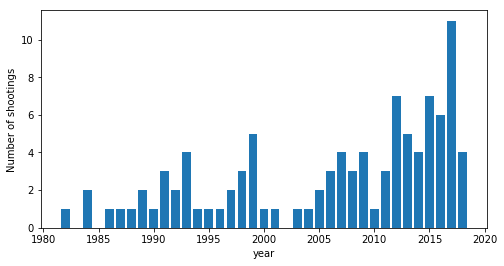

In [15]:
plot_counts_by('year')

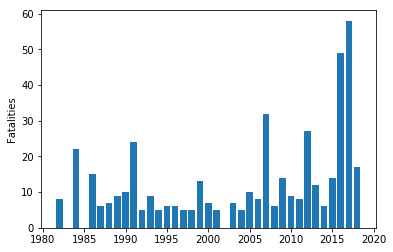

In [16]:
# What else with year? Number of fatalities?
plt.bar(df.year, df.Fatalities)
plt.ylabel('Fatalities')
plt.show()

In [17]:
import statename_abv as state_names

name_map = state_names.statename_to_abbr # name to state code map

def extract_state(location):
    state = location.split(',')[1].strip()
    return name_map.get(state, state)
    
df['state'] = df.location.map(extract_state)

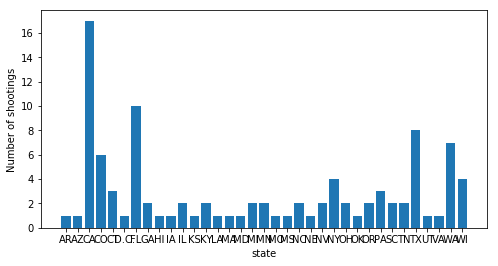

In [18]:
plot_counts_by('state')

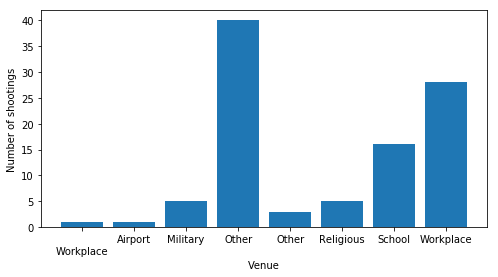

In [19]:
plot_counts_by('Venue')

In [20]:
df.Race[df.Race == 'White '] = 'White'
df.Race[df.Race == 'white'] = 'White'
df.Race[df.Race == 'black'] = 'Black'
df.Race[df.Race == '-'] = 'Unknown'
df.Race[df.Race == 'unclear'] = 'Unknown'
df.Race.unique()

/Users/Taylor/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Taylor/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Taylor/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package s

array(['White', 'Asian', 'Black', 'Unknown', 'Latino', 'Other',
       'Native American'], dtype=object)

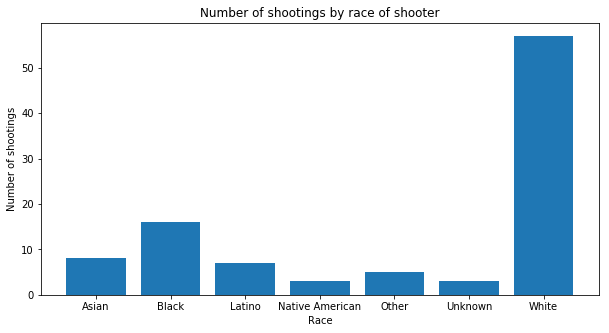

In [21]:
plot_counts_by('Race', figsize=(10,5), show=False)
plt.title('Number of shootings by race of shooter')
plt.savefig('shootings_by_race.png')
plt.show()

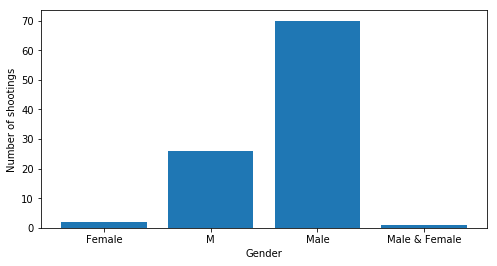

In [22]:
plot_counts_by('Gender')

In [23]:
# plot_counts_by('Weapons obtained legally')
# plot_counts_by('Where obtained')
df['Weapons obtained legally'].value_counts()
# df['Where obtained'].value_counts()

Yes                                                                                                                                    66
No                                                                                                                                     15
TBD                                                                                                                                     7
Unknown                                                                                                                                 6
\nYes                                                                                                                                   2
Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI     1
Yes                                                                                                                                     1
Yes ("some of the weapons were pur

> Interesting. Is mostly legal, but will need some cleanup to plot it

### What are the most violent shootings of 2016/2017?
These are where we will focus our NLP efforts because they will likely have the most stories

In [49]:
older = df[(df.year < 2018) & (df.year > 2014)]
older[older.casualties > 5]

,case,location,date,year,summary,Fatalities,Injured,total_victims,Venue,Prior signs of mental health issues,Mental health - details,Weapons obtained legally,Where obtained,Type of weapons,Weapon details,Race,Gender,Sources,Mental Health Sources,latitude,longitude,Type,casualties,state
4,Rancho Tehama shooting spree,"Rancho Tehama, CA",11/14/17,2017,"Kevin Janson Neal, 44, went on an approximatel...",5,10,15,Other,TBD,-,No,TBD,semiautomatic rifles,Two illegally modified rifles,White,M,https://www.nbcnews.com/news/us-news/californi...,-,40.018759,-122.393089,Spree,15,CA
5,Texas First Baptist Church massacre,"Sutherland Springs, TX",11/5/17,2017,"Devin Patrick Kelley, a 26-year-old ex-US Air ...",26,20,46,Religious,Yes,"Kelley had a history of domestic violence, inc...",Kelley passed federal criminal background chec...,Purchased in April 2016 from an Academy Sports...,semiautomatic rifle,Ruger AR-556; Kelley also possessed semiautoma...,White,M,https://www.washingtonpost.com/news/morning-mi...,http://www.expressnews.com/news/local/article/...,29.273282,-98.056488,Mass,46,TX
7,Edgewood businees park shooting,"Edgewood, MD",10/18/17,2017,"Radee Labeeb Prince, 37, fatally shot three pe...",3,3,6,Workplace,Unclear,-,No,Unclear,handgun,.380-caliber; make unclear,Black,M,http://www.baltimoresun.com/news/maryland/harf...,-,39.452189,-76.309988,Mass,6,MD
8,Las Vegas Strip massacre,"Las Vegas, NV",10/1/17,2017,"Stephen Craig Paddock, 64, rained a barrage of...",58,546,604,Other,TBD,Perpetrator's history unclear. In 1969 Paddock...,Yes,Two gun shops in Nevada,"23 firearms, mostly rifles; including scopes, ...","AR-15-style and AK-47-style rifles and ""a larg...",White,M,https://www.lvmpd.com/en-us/Documents/1_Octobe...,https://www.nytimes.com/2017/10/13/us/stephen-...,36.095739,-115.171544,Mass,604,NV
14,Fort Lauderdale airport shooting,"Fort Lauderdale, Florida",1/6/2017,2017,"Esteban Santiago, 26, flew from Alaska to Fort...",5,6,11 (dozens more were reportedly injured in the...,Airport,Yes,"Among other signs, Santiago had gone to a FBI ...",Yes,-,semiautomatic handgun\n,Walther 9mm semi-automatic pistol[,Latino,M,http://www.nytimes.com/2017/01/07/us/esteban-s...,http://www.nytimes.com/2017/01/07/us/esteban-s...,26.072751,-80.143382,Mass,11,FL
16,Baton Rouge police shooting,"Baton Rouge, LA",7/17/2016,2016,"Gavin Long, a former Marine who served in Iraq...",3,3,6,Other,Yes,Unclear,Unknown,-,Two semiautomatic rifles; one semiautomatic ha...,"IWI Tavor SAR 5.56 caliber rifle, Springfield ...",Black,M,http://time.com/4411027/baton-rouge-shooter-ga...,-,30.433601,-91.081403,Spree,6,LA
17,Dallas police shooting,"Dallas, Texas",7/7/2016,2016,"Micah Xavier Johnson, a 25-year-old Army veter...",5,11,16,Other,Unclear,Unclear,Yes,online and or gun show,"Semiautomatic rifle, semiautomatic handguns",Izhmash-Saiga 5.45mm (AK-style) semiautomatic ...,Black,M,http://www.nytimes.com/2016/07/11/us/dallas-sh...,-,32.780105,-96.800008,Mass,16,TX
18,Orlando nightclub massacre,"Orlando, Florida",6/12/2016,2016,"Omar Mateen, 29, attacked the Pulse nighclub i...",49,53,102,Other,Unclear,Unclear,Yes,"Shooting center in Port St. Lucie, Florida","Semiautomatic rifle, semiautomatic handgun","Sig Sauer MCX rifle, Glock 17 9mm; high-capaci...",Other,M,http://www.motherjones.com/politics/2016/06/as...,-,28.519718,-81.376777,Mass,102,FL
19,Excel Industries mass shooting,"Hesston, Kansas",2/25/2016,2016,"Cedric L. Ford, who worked as a painter at a m...",3,14,17,Workplace,Unclear,Unclear,Yes,-,"Semiautomatic rifle, semiautomatic handgun","Zastava Serbia AK-47-style rifle, Glock Model ...",Black,M,http://www.nytimes.com/2016/02/26/us/shooting-...,-,38.135992,-97.425145,Mass,17,KS
20,Kalamazoo shooting spree,"Kalamazoo County, Michigan",2/20/2016,2016,"Jason B. Dalton, a driver for Uber, apparently...",6,2,8,Other,Unclear,Unclear,Yes,-,Semiautomatic handgun,9 mm handgun (ammo used unclear),White,M,http://www.nytimes.com/2016/02/22/us/kalamazoo...,-,42.236689,-85.674795,M

In [52]:
i=20
display(df.loc[i])
print(df.loc[i]['summary'])
print(df.loc[i]['Mental health - details'])
print(df.loc[i]['Sources'])

case                                                            Kalamazoo shooting spree
location                                                      Kalamazoo County, Michigan
date                                                                           2/20/2016
year                                                                                2016
summary                                Jason B. Dalton, a driver for Uber, apparently...
Fatalities                                                                             6
Injured                                                                                2
total_victims                                                                          8
Venue                                                                              Other
Prior signs of mental health issues                                              Unclear
Mental health - details                                                          Unclear
Weapons obtained lega

Jason B. Dalton, a driver for Uber, apparently selected his victims randomly as he went on a rampage over several hours in three different locations, including five people he shot in the parking lot of a Cracker Barrel restaurant. He was "arrested without incident" at a downtown Kalamazoo bar about six hours after the rampage began.
Unclear
http://www.nytimes.com/2016/02/22/us/kalamazoo-michigan-random-shootings.html; http://www.mlive.com/news/kalamazoo/index.ssf/2016/02/4_things_we_know_about_kalamaz.html; http://www.mlive.com/news/kalamazoo/index.ssf/2016/02/prosecutor_mass_shooting_suspe.html#incart_river_index
